In [1]:
# import packages that will be used for plotting and analyzing the data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
# read in the data file for analysis

df = pd.read_csv('Data_Files/df_household_clean.csv', low_memory=False)
df.head()

,CONTROL,total_rooms,housing_cost,monthly_rent,garage,num_dining,num_laundry,gut_rehab,is_condo,stairs_broken,...,fuse_blow,home_better_than_last,nh_better_than_last,manager_onsite,adequacy,hud_subsidized,number_upkeep_probs,num_bathrooms,household_income,family_income
0,11000001,7,1250 to 1499,NaN,Yes,1,0,No,No,NaN,...,No fuses / breakers blown in the last 3 months,NaN,NaN,NaN,Adequate,NaN,Less than 3 upkeep problems,2.5 bathrooms,113000.0,113000.0
1,11000002,7,1500 to 1999,NaN,Yes,0,0,NaN,No,No,...,No fuses / breakers blown in the last 3 months,NaN,NaN,NaN,Adequate,NaN,Less than 3 upkeep problems,2.5 bathrooms,29000.0,29000.0
2,11000005,8,700 to 799,NaN,Yes,1,2,No,No,NaN,...,No fuses / breakers blown in the last 3 months,NaN,NaN,NaN,Moderately Inadequate,NaN,3 or 4 upkeep problems,3 bathrooms,69900.0,69900.0
3,11000007,8,1500 to 1999,NaN,Yes,1,1,Yes,No,NaN,...,No fuses / breakers blown in the last 3 months,NaN,NaN,NaN,Moderately Inadequate,NaN,3 or 4 upkeep problems,2.5 bathrooms,162700.0,162700.0
4,11000010,5,450 to 499,370.0,No,0,0,NaN,No,NaN,...,No fuses / breakers blown in the last 3 months,NaN,NaN,NaN,Adequate,Public housing tenants and tenants in privatel...,Less than 3 upkeep problems,1.5 bathrooms,21000.0,21000.0


In [3]:
rating_house_bin = [0 if i <=5 else 1 for i in df['rating_house']]

rating_nh_bin = [0 if i <=5 else 1 for i in df['rating_neighborhood']]

df['rating_house_bin'] = rating_house_bin
df['rating_nh_bin'] = rating_nh_bin



In [13]:
X = df.drop(['rating_house', 'rating_neighborhood', 'rating_house_bin', 'rating_nh_bin'], axis=1)
y = df.rating_house_bin

X2 = X.select_dtypes(include=[np.number])
X2.head()

,CONTROL,total_rooms,monthly_rent,num_dining,num_laundry,hh_age,year_moved_in,num_people,year_built,stories,unit_floors,num_bedrooms,num_kitchens,household_income,family_income
0,11000001,7,NaN,1,0,49.0,2000.0,3.0,2000,2,2.0,3,1,113000.0,113000.0
1,11000002,7,NaN,0,0,77.0,2005.0,2.0,2000,2,2.0,3,1,29000.0,29000.0
2,11000005,8,NaN,1,2,69.0,1995.0,3.0,1970,1,1.0,4,1,69900.0,69900.0
3,11000007,8,NaN,1,1,49.0,1997.0,4.0,1960,3,3.0,4,1,162700.0,162700.0
4,11000010,5,370.0,0,0,71.0,2005.0,1.0,1970,1,1.0,3,1,21000.0,21000.0


In [24]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X2)
X2 = imp.transform(X2)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)


In [46]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

<Container object of 15 artists>

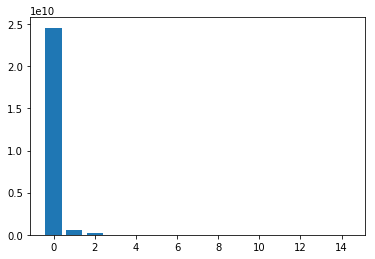

In [47]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)

In [48]:
pca = PCA(n_components=0)
pca.fit(X_train)
X_train = pca.transform(X_train)


TypeError: 'tuple' object is not callable

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [50]:
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

logreg_cv.fit(X_train, y_train)

print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

ValueError: Found array with 0 feature(s) (shape=(32609, 0)) while a minimum of 1 is required.

In [35]:
logreg = LogisticRegression(penalty='l1', C=.00001)
logreg.fit(X_train, y_train)



LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    0  1938]
 [    0 21356]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1938
          1       0.92      1.00      0.96     21356

avg / total       0.84      0.92      0.88     23294



C:\Users\wongk3.NA\AppData\Local\Continuum\Anaconda2\envs\newPy36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


11647